# 🧪 Evaluation Metrics Demo
This notebook demonstrates key evaluation metrics for both classification and regression problems using scikit-learn.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay,
    roc_curve, auc,
    mean_squared_error, mean_absolute_error, r2_score
)

## 🧩 Classification Metrics

In [2]:
# Load Iris dataset and make it binary
X, y = load_iris(return_X_y=True)
y_binary = (y == 2).astype(int)  # Convert to binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Needed for ROC

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


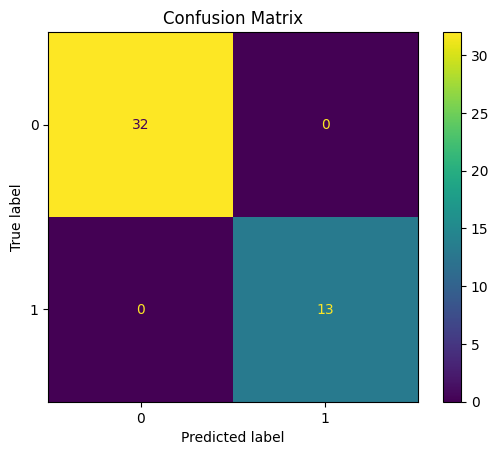

In [4]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

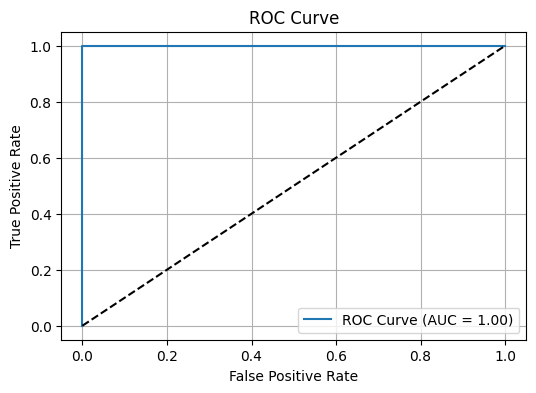

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## 📈 Regression Metrics

In [6]:
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

In [7]:
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R²:", r2_score(y_test_reg, y_pred_reg))

MSE: 261.5702418137987
MAE: 12.628898462530397
R²: 0.9702903588877088


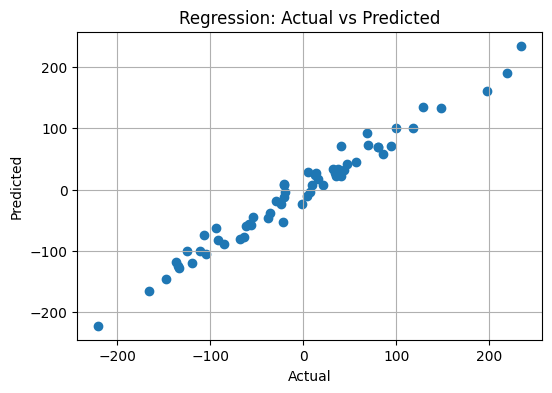

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression: Actual vs Predicted")
plt.grid(True)
plt.show()